<a href="https://colab.research.google.com/github/CeSaRLoPeZArTeAgA/EDO_Aplicadas-IMCA/blob/main/RK_4_EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAESTRIA DE MODELIZACION MATEMATICA Y COMPUTACIONAL
---
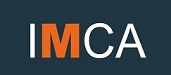


---


# CLASE: Runge Kutta de orden 4 para EDO


# Metodo RK-4 para EDO

Sea el problema de valor inicial(PVI):

$$   y=f(t,y) $$
con
$y(a)=\alpha$  y  $a<t<b$


Donde $f$ una funcion Lipschitziana en la variable $y$. El método consiste en lo siguiente iteracion:

$$w_{i+1}=w_{i}+\frac{h}{6}(K_{1}+2K_{2}+2K_{3}+K_{4})$$

Donde:
* $K_{1}=f(t_{i},u_{i})$
* $K_{2}=f(t_{i}+ \frac{h}{2}+,u_{i}+h\frac{K_{1}}{2})$
* $K_{3}=f(t_{i}+ \frac{h}{2}+,u_{i}+h\frac{K_{2}}{2})$
* $K_{4}=f(t_{i}+h,u_{i}+hK_{3})$

In [1]:
#RUNGE KUTTA ORDEN 4 - EDO
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#definicion de la funcion f
def f(t,y):
  return y-t**2+1
#Metodo de RK
def RK4(a,b,y0,f,N):
  """
  Implementacion metodo de RK4
  a--Inicio Intervalo
  b--Fin de Intervalo
  y0--Aproximacion Inicial
  f-funcion
  N--Pasos
  Salida
  w--aproximacion final
  """
  h=(b-a)/N
  t=a
  w=y0
  Y,T=[],[]
  T+=[a]
  Y+=[w]
  for i in range(1,N+1):
    k1=h*f(t,w)
    k2=h*f(t+h/2,w+k1/2)
    k3=h*f(t+h/2,w+k2/2)
    k4=h*f(t+h,w+k3)
    w=w+(k1+2*k2+2*k3+k4)/6
    Y+=[w]
    t=a+i*h
    T+=[t]
  return T,Y

In [2]:
# Definicion de la funcion solucion Y
def ff(T):
  y_real=[]
  for t in T:
    y_real+=[(t+1)**2-0.5*np.exp(t)]
  return y_real

      t       w_i       y_i        Er
0   0.0  0.500000  0.500000  0.000000
1   0.2  0.829293  0.829299  0.000006
2   0.4  1.214076  1.214088  0.000009
3   0.6  1.648922  1.648941  0.000011
4   0.8  2.127203  2.127230  0.000013
5   1.0  2.640823  2.640859  0.000014
6   1.2  3.179894  3.179942  0.000015
7   1.4  3.732340  3.732400  0.000016
8   1.6  4.283409  4.283484  0.000017
9   1.8  4.815086  4.815176  0.000019
10  2.0  5.305363  5.305472  0.000021


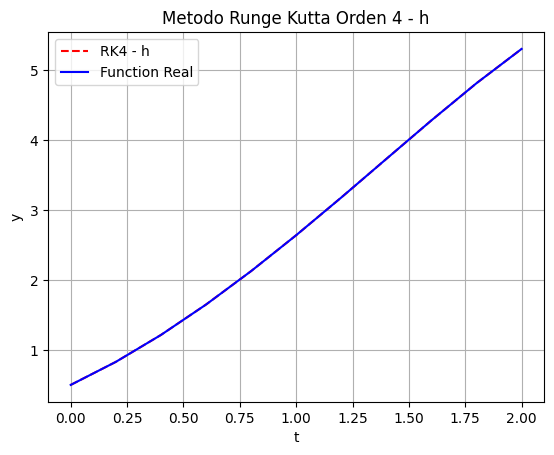

In [12]:
#RK-4 para h=0.5
tr,yr1=RK4(0,2,0.5,f,10)
yv=ff(tr)
datos={'t':tr,'w_i':yr1,'y_i':yv,'Er': [z / q for z,q in zip([x-y for x,y in zip(yv,yr1)],yv)]}
df1=pd.DataFrame(datos)
print(df1)

plt.plot(tr,yr1,linestyle='--', color='red')
plt.plot(tr,yv,'b')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Metodo Runge Kutta Orden 4 - h')
plt.legend(['RK4 - h','Function Real'])
plt.show()